In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/ASD/Dataset/"

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(150,150),
  batch_size=64)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(150,150),
  batch_size=64)

Found 3040 files belonging to 2 classes.
Using 2280 files for training.
Found 3040 files belonging to 2 classes.
Using 760 files for validation.


In [ ]:
inc3 = InceptionV3(input_shape = (150, 150, 3), weights = 'imagenet', include_top = False)

In [ ]:
for layer in inc3.layers:
    layer.trainable = False

x = Flatten()(inc3.output)
prediction = Dense(10, activation='softmax')(x)

model = Model(inputs=inc3.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalization_94

In [ ]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 1)

36/36 [==============================] - 275s 8s/step - loss: 44.6591 - accuracy: 0.5917 - val_loss: 26.1906 - val_accuracy: 0.6079


In [ ]:
import tensorflow as tf

model.save('/content/drive/MyDrive/Colab Notebooks/ASD/Saved_Model_History/InceptionV3.h5')

# Save the history to a file
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/ASD/Saved_Model_History/InceptionV3.pkl', 'wb') as history_file:
    pickle.dump(history.history, history_file)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


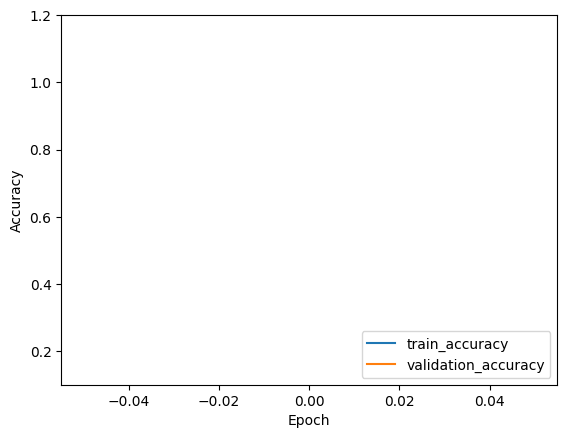

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.2])
plt.legend(loc='lower right')

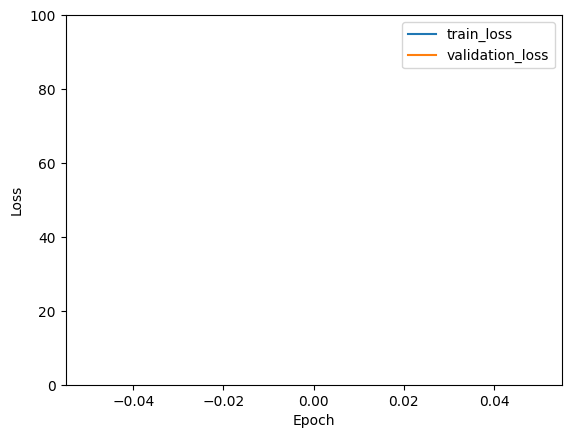

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 100])
plt.legend(loc='upper right')

2/2 [==============================] - 2s 946ms/step


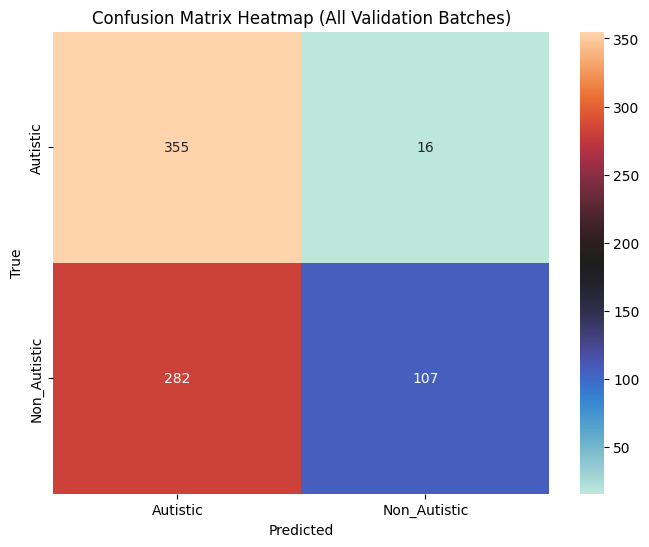

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class_names = ['Autistic','Non_Autistic']

all_val_labels = []
all_val_predictions = []

# Evaluate the model on the validation dataset batch by batch
for batch in val_ds:
    val_images, val_labels_batch = batch
    val_predictions_batch = model.predict(val_images)

    val_labels_batch = np.array(val_labels_batch)
    val_predictions_batch = np.argmax(val_predictions_batch, axis=-1)

    all_val_labels.extend(val_labels_batch)
    all_val_predictions.extend(val_predictions_batch)

# Calculate the confusion matrix for all validation data
conf_matrix = confusion_matrix(all_val_labels, all_val_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='icefire', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap (All Validation Batches)')
plt.show()

In [ ]:
print(classification_report(all_val_labels, all_val_predictions, target_names=class_names))

              precision    recall  f1-score   support

    Autistic       0.56      0.96      0.70       371
Non_Autistic       0.87      0.28      0.42       389

    accuracy                           0.61       760
   macro avg       0.71      0.62      0.56       760
weighted avg       0.72      0.61      0.56       760

